In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

### 1.importing data

In [3]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### 2.1 getting data ready

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data[data.duplicated()].shape       #checking no. of duplicate records

(0, 6)

In [6]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])
data['Urban']= label_encoder.fit_transform(data['Urban'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


### 2.2 handling target variable

<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

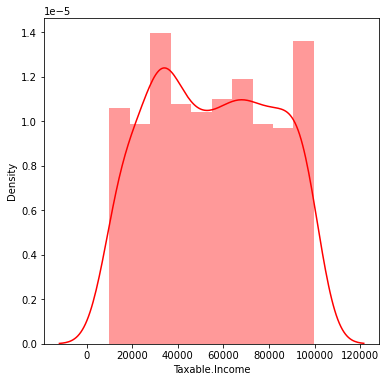

In [7]:
plt.figure(figsize=(6,6)) 

sns.distplot(data['Taxable.Income'],bins=10,  kde = True, color =  'red' ) 

In [8]:
data['status'] = data['Taxable.Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')
data['status'].value_counts()                                            #0 = good , 1 = risky --- according to alphabets

Good     476
Risky    124
Name: status, dtype: int64

In [9]:
label_encoder = preprocessing.LabelEncoder()
data['status']= label_encoder.fit_transform(data['status'])

In [10]:
data.drop(['Taxable.Income'], axis=1, inplace=True)
data.head()                                                    #we converted Taxable.Income into good/bad status

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


### 2.3 detecting outliers

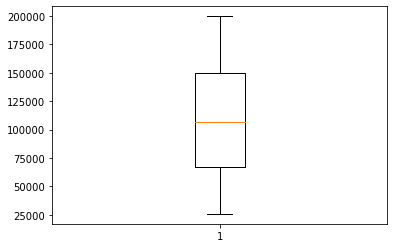

[array([66966.75, 25779.  ]), array([150114.25, 199778.  ])]

In [11]:
box=plt.boxplot(x='City.Population', data=data)

plt.show()

[item.get_ydata() for item in box['whiskers']]

### 3.splitting data into training and testing data

In [12]:
x=data.iloc[:,:5]
y=data.iloc[:,5]

In [13]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### 4.building decision tree classifier

#### using entropy method ( criterion = 'entropy' ) / gini method ( criterion = 'gini' )

##### a.taining the model

In [14]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, max_leaf_nodes=10)
#model = DecisionTreeClassifier(criterion = 'gini', max_depth=3, max_leaf_nodes=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10)

##### b.predicting the model

In [15]:
pred_train = model.predict(x_train)       #prediction on train data
pred_test = model.predict(x_test)        #prediction on test data

##### c.checking training accuray

In [16]:
y_train.value_counts()

0    384
1     96
Name: status, dtype: int64

In [17]:
pd.Series(pred_train).value_counts()

0    471
1      9
dtype: int64

In [18]:
pd.crosstab(y_train,pred_train) # getting the 2 way table to understand the correct and wrong predictions
                                # y_test along rows and pred_test along columns

col_0,0,1
status,,
0,382,2
1,89,7


In [19]:
# training accuracy 
np.mean(pred_train==y_train)

0.8104166666666667

##### d.checking testing accuracy

In [20]:
y_test.value_counts()

0    92
1    28
Name: status, dtype: int64

In [21]:
pd.Series(pred_test).value_counts()

0    117
1      3
dtype: int64

In [22]:
pd.crosstab(y_test,pred_test) # getting the 2 way table to understand the correct and wrong predictions
                              # y_test along rows and pred_test along columns

col_0,0,1
status,,
0,90,2
1,27,1


In [23]:
# testing accuracy 
np.mean(pred_test==y_test)

0.7583333333333333

##### e.Plot the decision tree

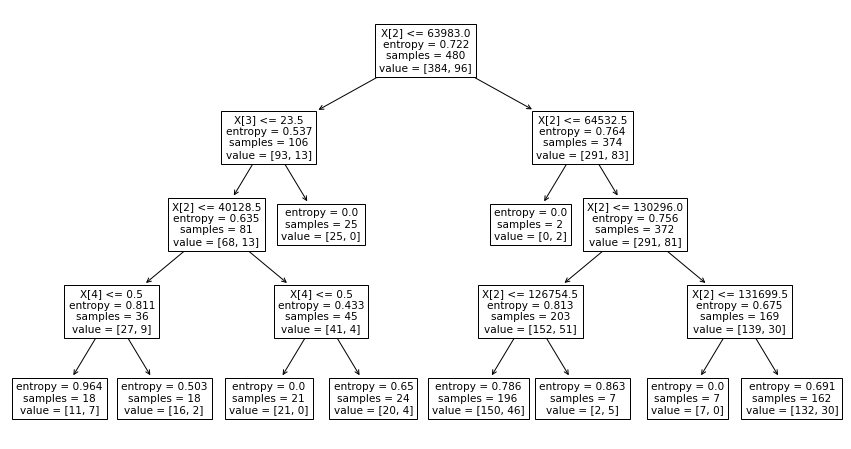

In [24]:
plt.figure(figsize=(15,8)) 
tree.plot_tree(model);

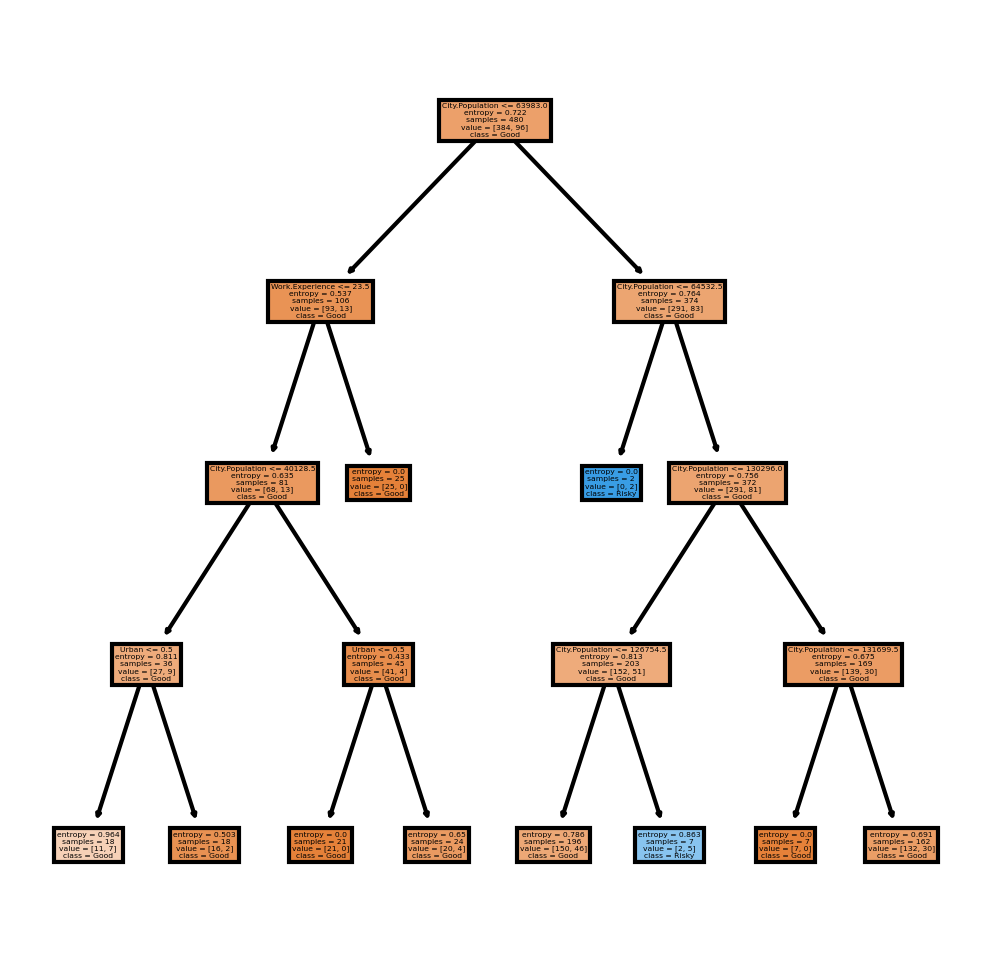

In [25]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Good', 'Risky']                                                         #0, 1 :: 'Good', 'Risky'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);